In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
#посмотрим, как распределены значения в зависимом столбце
df['Churn'].describe()

count      3333
unique        2
top       False
freq       2850
Name: Churn, dtype: object

In [6]:
#посмотрим, с какой точностью будет работать модель, если всем клиентам предсказывать, что они не уйдут
d=2850/3333
d

0.8550855085508551

In [7]:
#переводим логическую переменную в числовой формат
df['Churn'] = df['Churn'].astype(int)

In [8]:
#переводим объектные (текстовые) переменные в числовой формат с помощью one-hot кодирования
df = pd.concat([df, pd.get_dummies(df['State'], prefix="State")], axis=1)
df.drop(['State'], axis=1, inplace=True)

In [9]:
#кодируем поля обычным способом (0 и 1)
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null int32
Sta

In [11]:
#указываем входы и выходы модели
X = df.drop(('Churn'), axis=1)
y = df['Churn']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
clf.score(X_train, y_train)

0.8627156789197299

In [15]:
clf.intercept_, clf.coef_

(array([-4.07066101]),
 array([[-4.69273971e-04, -3.91658752e-03,  2.05676811e+00,
          5.06356783e-01, -9.98850666e-03,  8.76665757e-03,
         -2.22863712e-03,  1.03747522e-02,  4.86897416e-03,
         -4.37877092e-03,  1.65446471e-03,  2.20002079e-03,
         -2.58905964e-03, -5.67937396e-03,  4.57757497e-02,
         -1.18212631e-01,  3.23823314e-02,  4.93523703e-01,
         -8.60467014e-01, -5.72880028e-01, -1.32072727e-01,
         -9.21521687e-01,  6.70001429e-01, -1.42207105e-01,
          1.10977433e-01, -1.31061183e-01, -3.52332471e-02,
         -2.01797819e-01, -3.21714758e-01, -6.17180864e-01,
         -3.84865141e-01,  4.44713138e-02, -9.02468454e-01,
         -3.11734222e-01,  3.34067195e-01, -6.40458620e-02,
          4.40075508e-02,  2.64713178e-01,  2.38842632e-01,
          5.92208511e-01,  4.15401947e-01,  2.15001567e-01,
         -1.06711095e-01,  3.19376757e-01,  8.31748703e-01,
         -2.96182288e-01, -7.03053117e-01, -5.60226397e-01,
         -2.16530

In [16]:
clf.predict(X_test[-1:])

array([0])

In [17]:
#подключаем roc-кривую
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

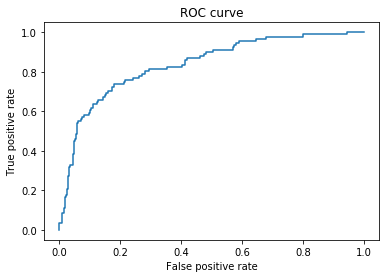

In [18]:
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred)

0.8366338522588522

In [20]:
#проверяем, нельзя ли улучшить линейную регрессию, добавив полиномиальные признаки
pf = PolynomialFeatures(degree=2)
X_train_polynomial = pf.fit_transform(X_train)
X_test_polynomial = pf.fit_transform(X_test)
lf = LogisticRegression()
lf.fit(X_train_polynomial, y_train)
lf.score(X_train_polynomial, y_train) #смотрим R^2 на обучающей выборке

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9287321830457614

In [21]:
lf.score(X_test_polynomial, y_test)

0.9085457271364318

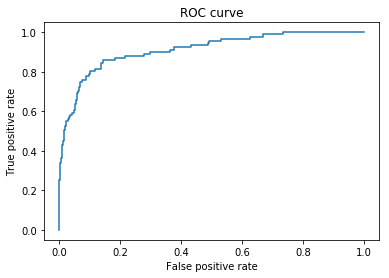

In [22]:
y_pred = lf.predict_proba(X_test_polynomial)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [23]:
# Делаем дерево решений
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [24]:
import eli5
eli5.explain_weights_sklearn(dtc, feature_names=X_train.columns.values)

Weight,Feature
0.2130,Total day minutes
0.1101,Customer service calls
0.1036,Total eve charge
0.0866,Total intl minutes
0.0774,International plan
0.0738,Total intl calls
0.0550,Voice mail plan
0.0453,Total day charge
0.0239,Total night minutes
0.0217,Total eve minutes
